In [1]:
import numpy as np
from numpy import arange
from matplotlib import pyplot
import pandas as pd
import re
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%cd '/content/drive/MyDrive/Project'
!ls

/content/drive/MyDrive/Project
'Copy of Project.ipynb'   Project.ipynb    'Untitled document.gdoc'
 Data.csv		  Untitled0.ipynb


In [ ]:
data = pd.read_csv('Data.csv')

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
data.shape

(8523, 12)

# Dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [ ]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
data.isnull().sum()/data.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Tiền Xử Lý dữ liệu

Visualize dữ liệu

[]

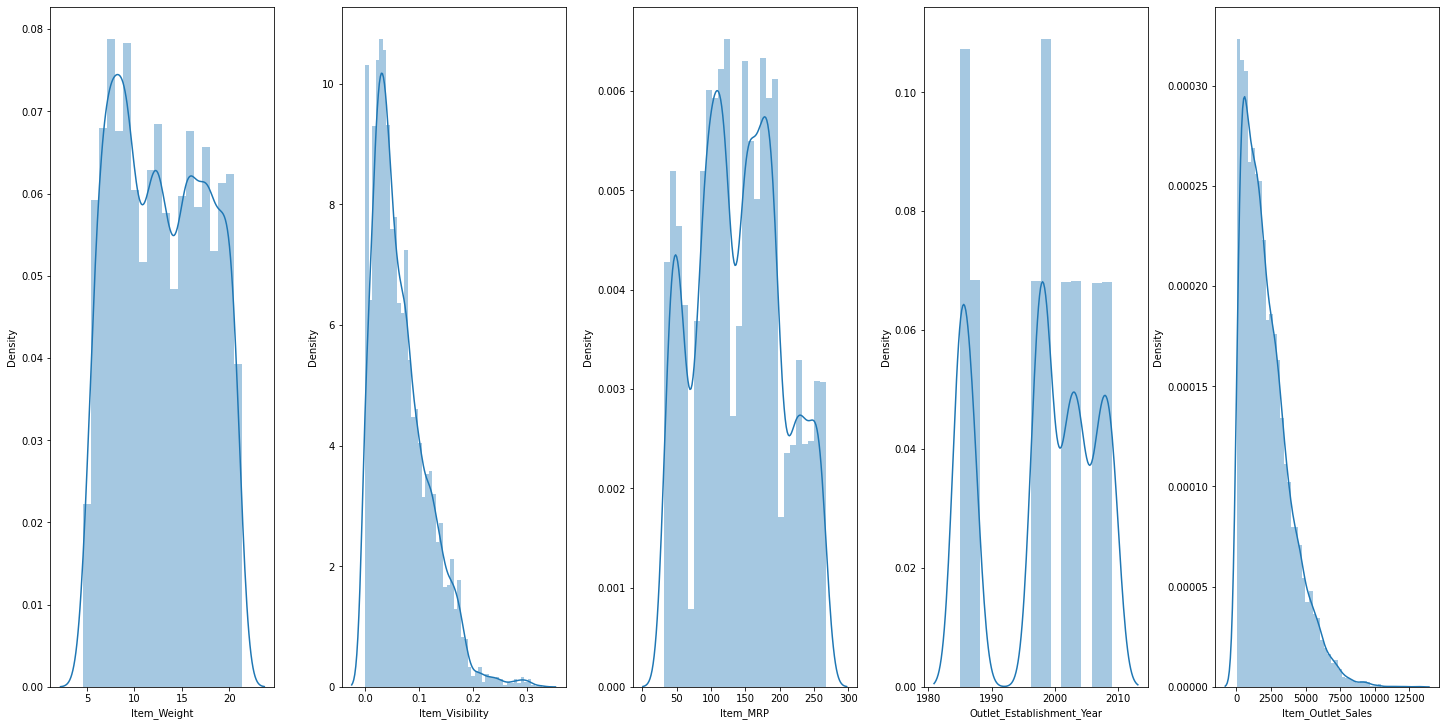

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i in data.describe().columns:
    sns.distplot(data   [i], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.plot()

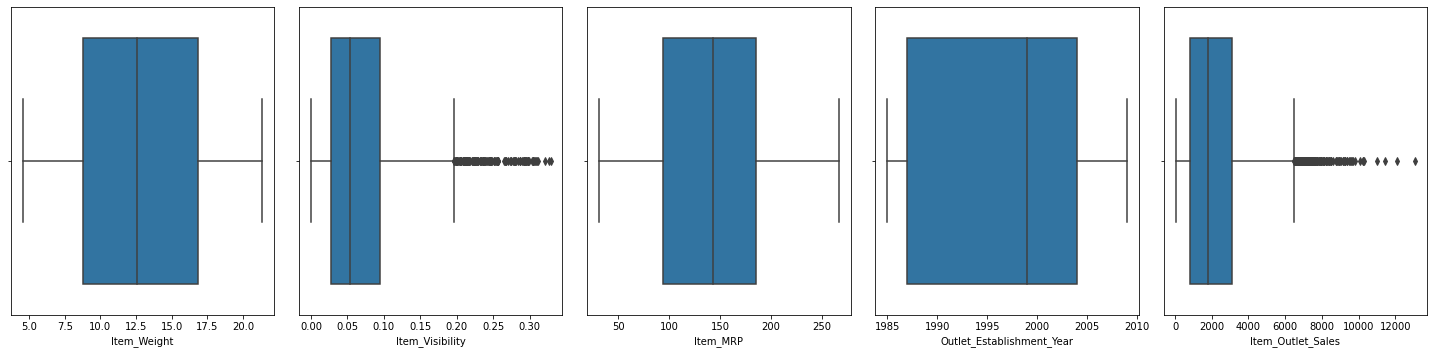

In [ ]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
for i in data.describe().columns:
    sns.boxplot(data[i], ax=axs[index])
    index += 1
plt.tight_layout(pad=1, w_pad=1, h_pad=1)

In [ ]:
for i in data.describe().columns:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  irq = q3 - q1
  data_col = data[i][(data[i] <= q1 - 1.5 * irq) | (data[i] >= q3 + 1.5 * irq)]
  perc = np.shape(data_col)[0] * 100.0 / np.shape(data)[0]
  print("Column %s outliers = %.2f%%" % (i, perc))

Column Item_Weight outliers = 0.00%
Column Item_Visibility outliers = 1.69%
Column Item_MRP outliers = 0.00%
Column Outlet_Establishment_Year outliers = 0.00%
Column Item_Outlet_Sales outliers = 2.18%


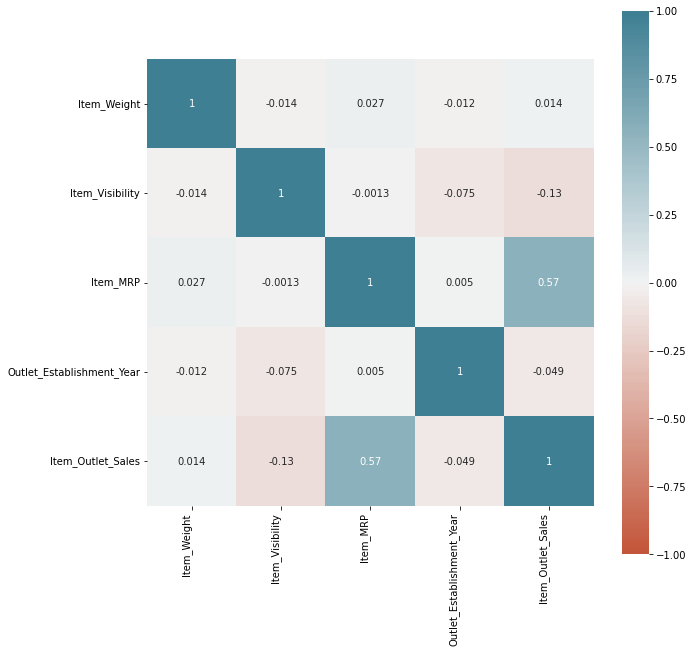

In [ ]:
# correlation
cor = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

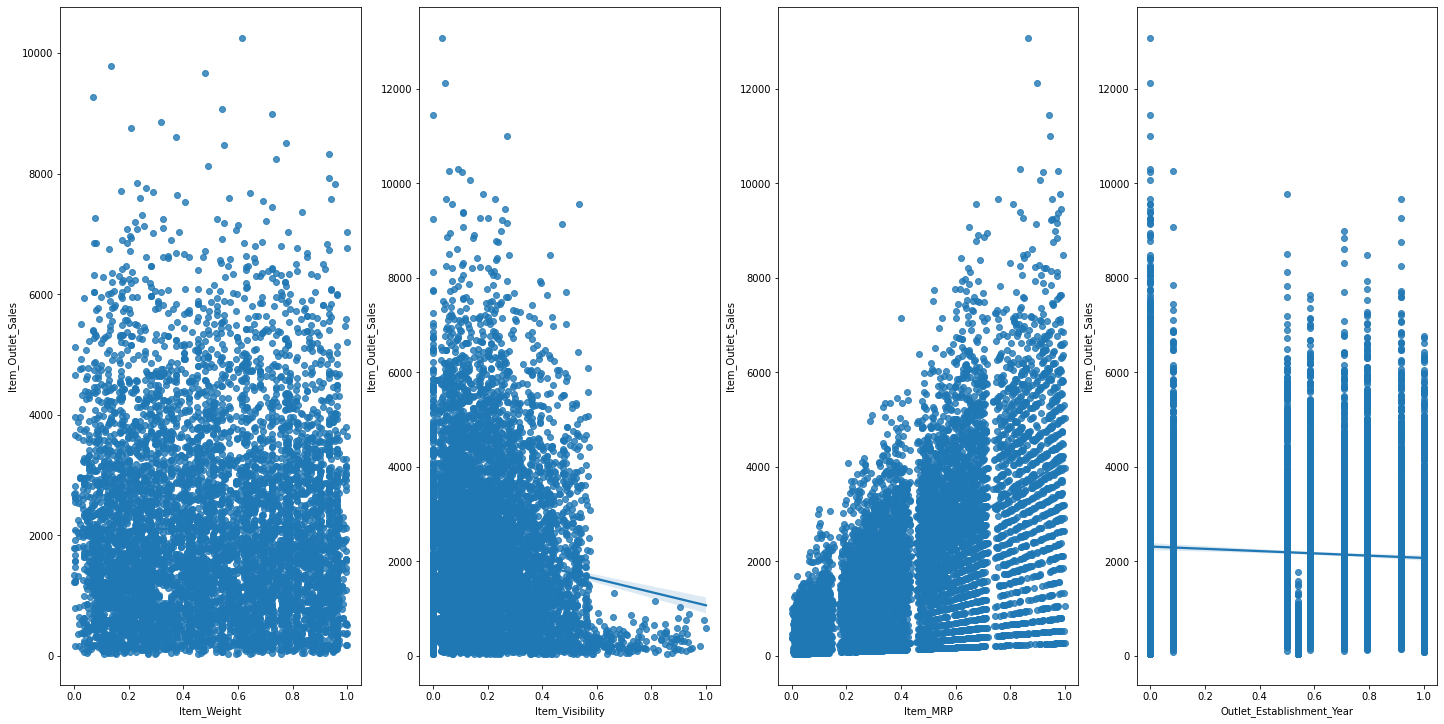

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
x = data.loc[:,column_sels]
y = data['Item_Outlet_Sales']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

Xử lý dữ liệu bị mất 

Item Size

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
data['Item_Weight'].isnull().sum()

1463

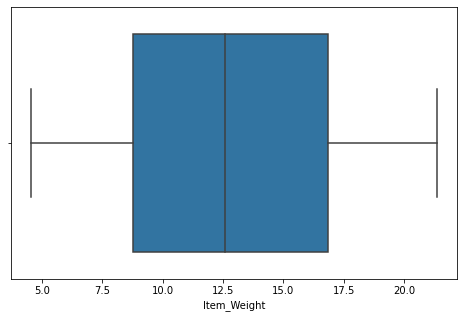

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight', data=data)

In [ ]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [ ]:
data['Item_Weight'].isnull().sum()

0

Outlet Size

In [ ]:
data['Outlet_Size'].isnull().sum()

2410

In [ ]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [ ]:
data['Outlet_Size'].isnull().sum()

0

In [ ]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Item Fat Content

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
data['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)

In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Years Established

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
data['Years_Established'] = data['Outlet_Establishment_Year'].apply(lambda x: 2022 - x)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


# Phân tích dữ liệu

Item Fat Content

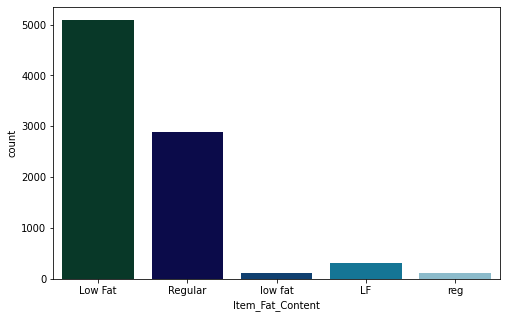

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content', data=data, palette='ocean')

Item Type

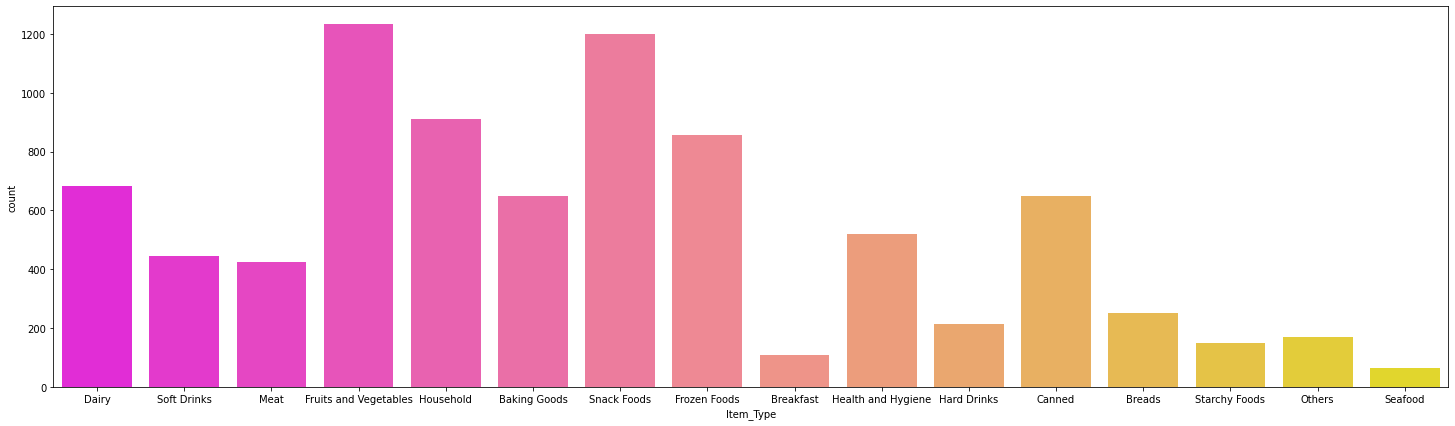

In [ ]:
plt.figure(figsize=(25,7))
sns.countplot('Item_Type', data=data, palette='spring')

Outlet Size

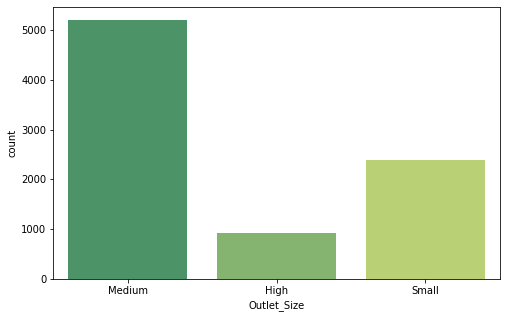

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size', data=data, palette='summer')

Outlet Location Type

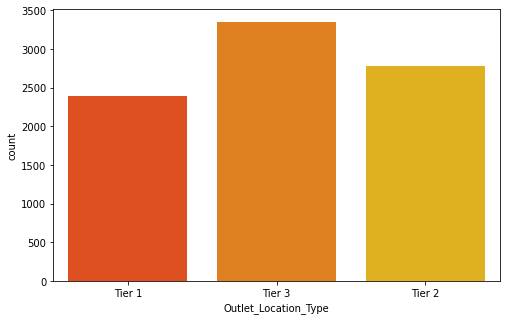

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type', data=data, palette='autumn')

Outlet Type

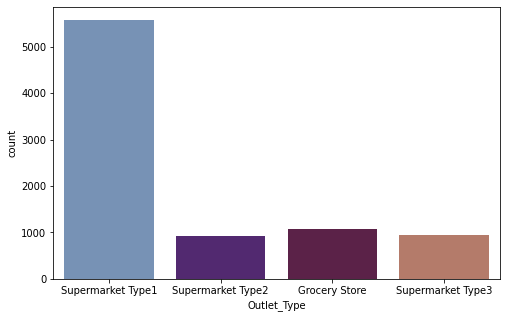

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type', data=data, palette='twilight')

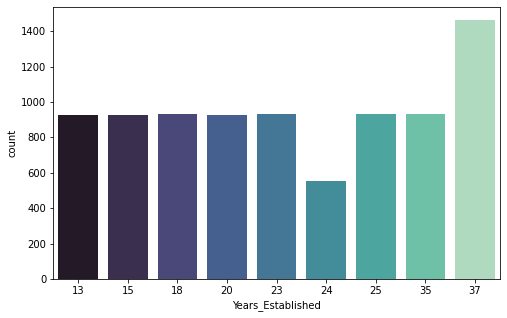

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Years_Established', data=data, palette='mako')

# Ảnh hưởng tới Doanh số

In [ ]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Years_Established'],
      dtype='object')

Item Fat Content

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64>

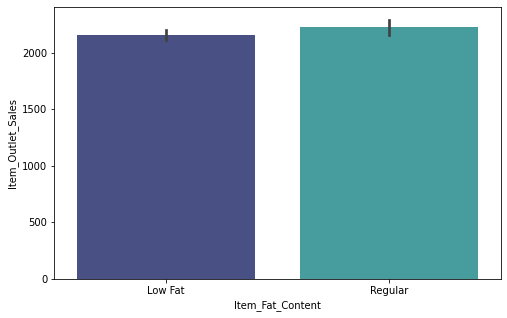

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content', 'Item_Outlet_Sales', data=data, palette='mako')

In [ ]:
sns.barplot()

Item Visibility

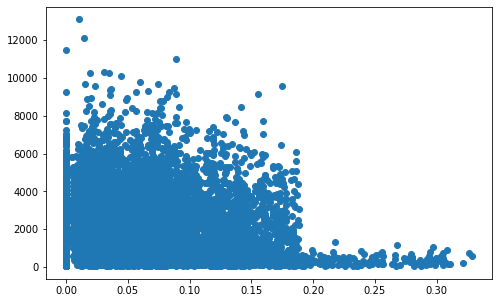

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility', 'Item_Outlet_Sales', data=data)

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


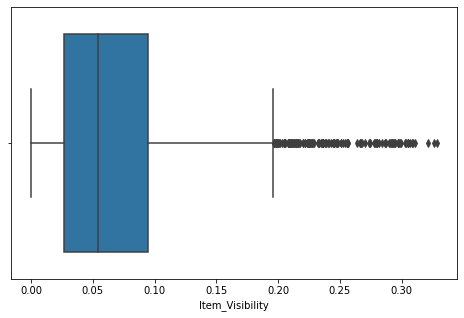

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Visibility', data=data)

In [ ]:
data['Item_Visibility'] = data['Item_Visibility'].replace(0, data['Item_Visibility'].median())

Text(0, 0.5, 'Item Visibility')

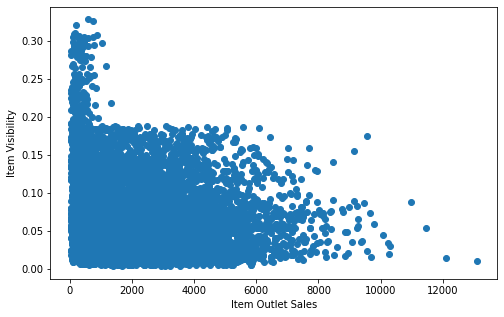

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Visibility', x='Item_Outlet_Sales',data=data)
plt.xlabel("Item Outlet Sales")
plt.ylabel("Item Visibility")

Item Type

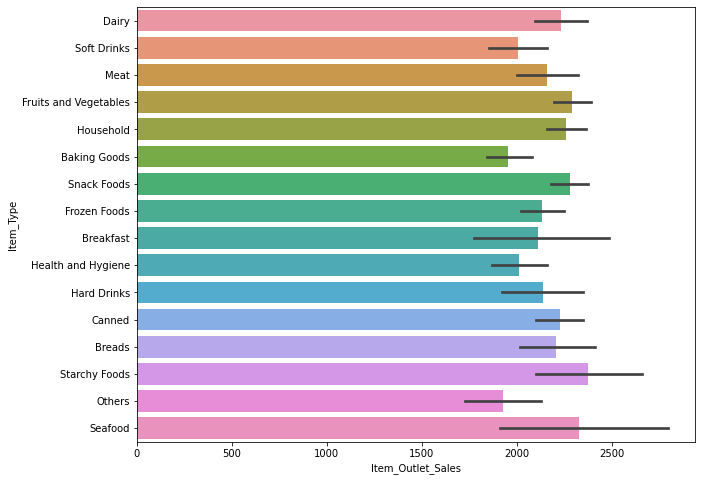

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y="Item_Type", x='Item_Outlet_Sales', data=data)

MRP

Text(0, 0.5, 'Item Outlet Sales')

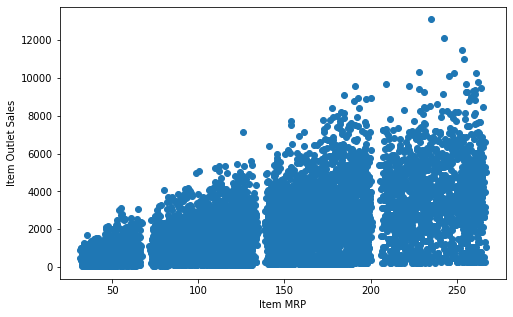

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=data)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

Outlet Size

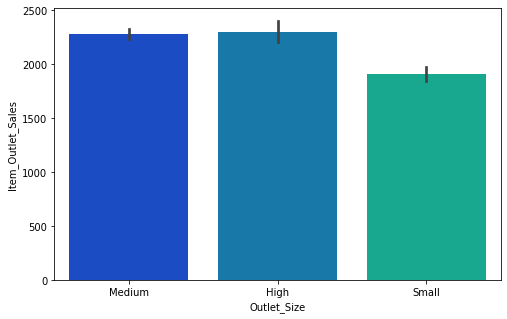

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data,palette='winter')

Outlet Location Type

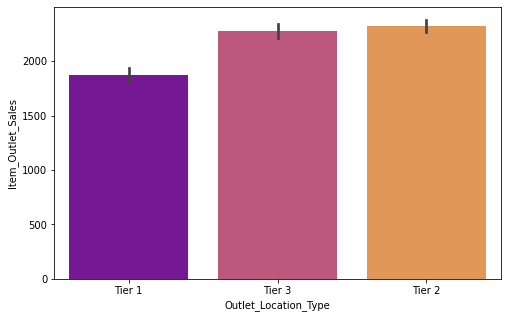

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data,palette='plasma')

Years Established

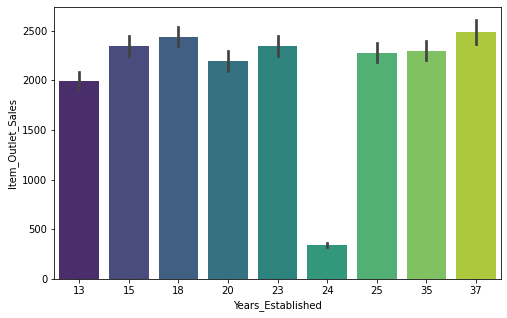

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Years_Established',y='Item_Outlet_Sales',data=data,palette='viridis')

Multivariate Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

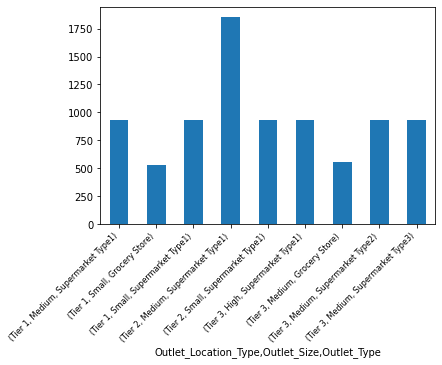

In [ ]:
data.groupby(['Outlet_Location_Type','Outlet_Size','Outlet_Type']).size().plot(kind='bar')
plt.xticks(rotation=45,horizontalalignment='right',fontsize=8)

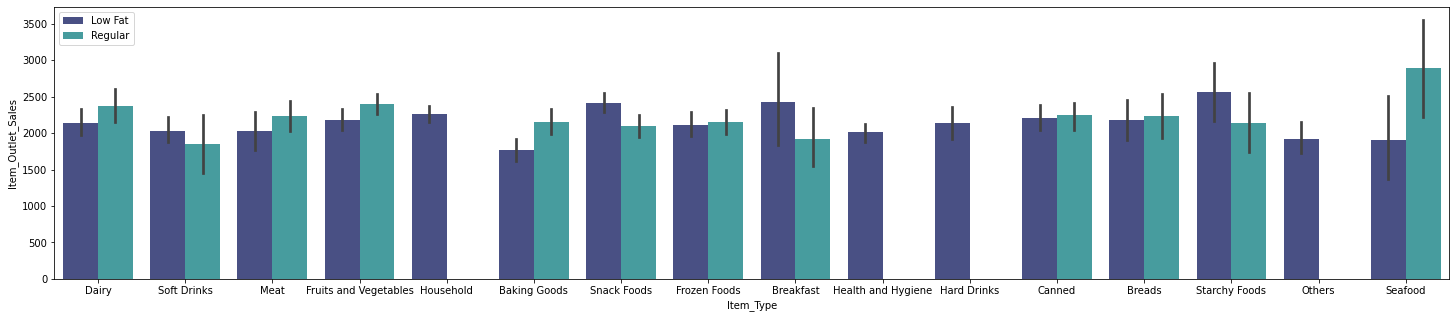

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=data,palette='mako')
plt.legend()

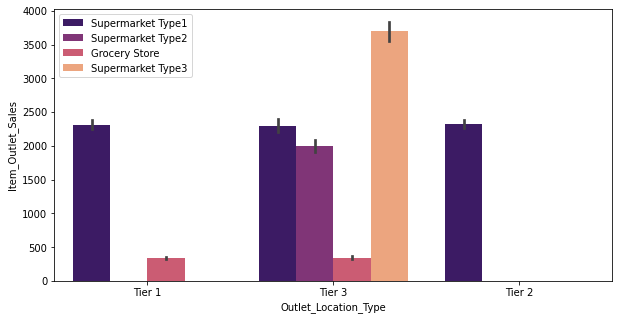

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=data,palette='magma')
plt.legend()

Chuyển dữ liệu chuỗi thành số

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [ ]:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Outlet'])
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Years_Established              int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_0                    uint8
Item_Type_1                    uint8
Item_Type_2                    uint8
Item_Type_3                    uint8
Item_Type_4                    uint8
Item_Type_5                    uint8
Item_Type_6                    uint8
I

In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Years_Established,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,23,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,13,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,23,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.053931,182.0950,OUT010,1998,732.3800,24,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.053931,53.8614,OUT013,1987,994.7052,35,1,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Years_Established,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,23,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,13,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,23,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.053931,182.0950,OUT010,1998,732.3800,24,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.053931,53.8614,OUT013,1987,994.7052,35,1,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
data

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Years_Established,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,0.016047,249.8092,OUT049,1999,3735.1380,23,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.019278,48.2692,OUT018,2009,443.4228,13,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.016760,141.6180,OUT049,1999,2097.2700,23,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.053931,182.0950,OUT010,1998,732.3800,24,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.053931,53.8614,OUT013,1987,994.7052,35,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,1987,2778.3834,35,1,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,2002,549.2850,20,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,2004,1193.1136,18,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,2009,1845.5976,13,0,1,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = data.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis=1)

In [ ]:
scale=MinMaxScaler()
col=list(data.columns.drop('Item_Outlet_Sales'))
col
sales2=scale.fit_transform(data)

In [ ]:
sales1 = data.copy()

In [ ]:
sales=pd.DataFrame(sales2,columns=data.columns)
sales["Item_Outlet_Sales"]=sales1['Item_Outlet_Sales']
sales.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_Established,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.282525,0.038399,0.927507,3735.1380,0.416667,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.081274,0.048346,0.072068,443.4228,0.000000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770765,0.040593,0.468288,2097.2700,0.416667,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.871986,0.155030,0.640093,732.3800,0.458333,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.155030,0.095805,994.7052,0.916667,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = sales

In [ ]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Years_Established,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0.282525,0.038399,0.927507,3735.1380,0.416667,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.081274,0.048346,0.072068,443.4228,0.000000,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.770765,0.040593,0.468288,2097.2700,0.416667,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.871986,0.155030,0.640093,732.3800,0.458333,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.260494,0.155030,0.095805,994.7052,0.916667,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = data.drop(['Item_Outlet_Sales'], axis=1)
y= data['Item_Outlet_Sales']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=22)

#Model

In [ ]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -1245732.769914 (99060.925543)
LASSO: -1244454.242998 (98743.219245)
EN: -2286836.655724 (182105.072886)
KNN: -1464609.067612 (109433.171517)
CART: -2275536.850199 (218598.281890)
SVR: -2865041.084161 (238976.184841)


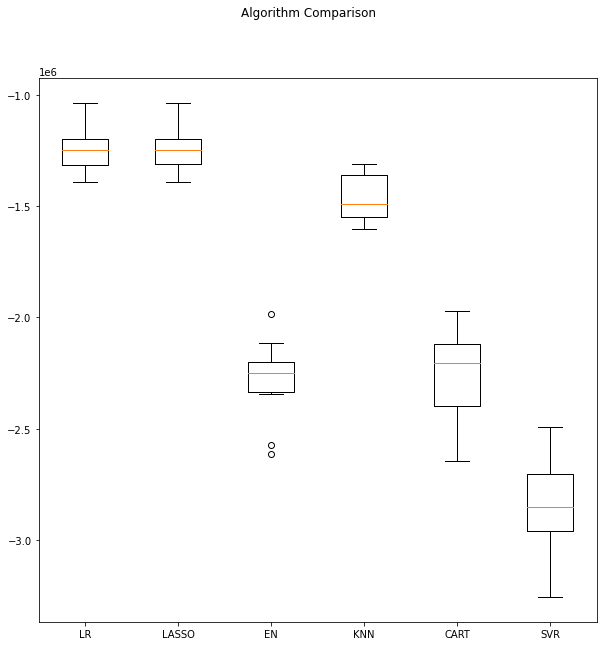

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: -1245723.625974 (99003.572526)
ScaledLASSO: -1245349.274324 (99034.459786)
ScaledEN: -1370080.059515 (113248.403181)
ScaledKNN: -1504693.988822 (105909.226362)
ScaledCART: -2247233.008837 (205865.968904)
ScaledSVR: -2863827.988811 (236137.419814)


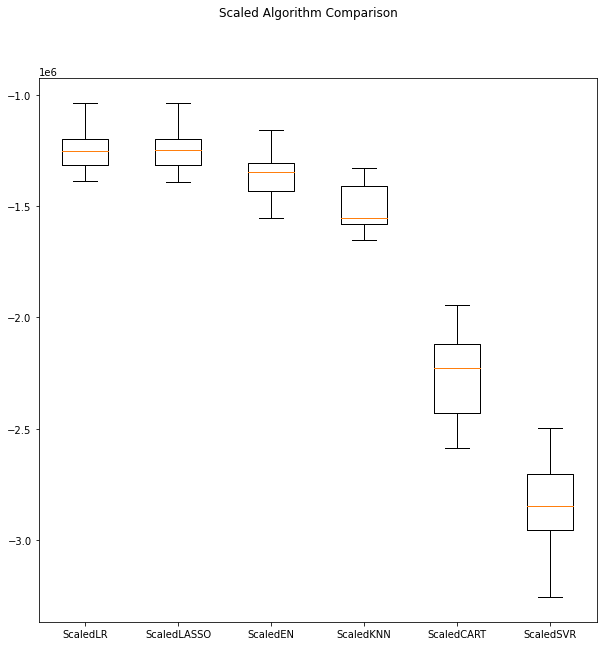

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

KNN

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1489125.254036 using {'n_neighbors': 7}
-2428137.237341 (179416.413601) with: {'n_neighbors': 1}
-1643250.025383 (141413.094262) with: {'n_neighbors': 3}
-1503331.970951 (104832.660534) with: {'n_neighbors': 5}
-1489125.254036 (109622.665144) with: {'n_neighbors': 7}
-1514616.609731 (106080.488712) with: {'n_neighbors': 9}
-1545401.500622 (112721.144222) with: {'n_neighbors': 11}
-1574971.455854 (112028.565346) with: {'n_neighbors': 13}
-1605743.712535 (112653.398772) with: {'n_neighbors': 15}
-1632519.816745 (107691.504958) with: {'n_neighbors': 17}
-1657052.025587 (115704.005369) with: {'n_neighbors': 19}
-1685799.126984 (118143.317719) with: {'n_neighbors': 21}


In [ ]:
KNN = KNeighborsRegressor(n_neighbors=7)
KNN.fit(X_train, Y_train)
print("Score: ", round(KNN.score(X_test,Y_test)*100))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test, KNN.predict(X_test))))

Score:  45
Root Mean Squared Error: 1302.457134685401


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train,Y_train)

NameError: ignored

In [ ]:
lr_accuracy = round(lr.score(X_test,Y_test)*100)
print("Score: ", lr_accuracy)
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test, lr.predict(X_test))))

Score:  54
Root Mean Squared Error: 1191.2689974405753


LASSO

In [ ]:
ls = Lasso()
ls.fit(X_train, Y_train)
print("Score: ", round(ls.score(X_test,Y_test)*100))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test, ls.predict(X_test))))

Score:  54
Root Mean Squared Error: 1189.6175845007488


In [ ]:
from xgboost import XGBRegressor

In [ ]:
# ensembles
ensembles = []
# boosting
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', XGBRegressor())])))
# bagging
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle= True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledAB: -1452492.067220 (117239.850532)
ScaledGBM: -1138386.927041 (115778.955690)
[08:24:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:24:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:24:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:24:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:24:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:24:41] WARNING: /works

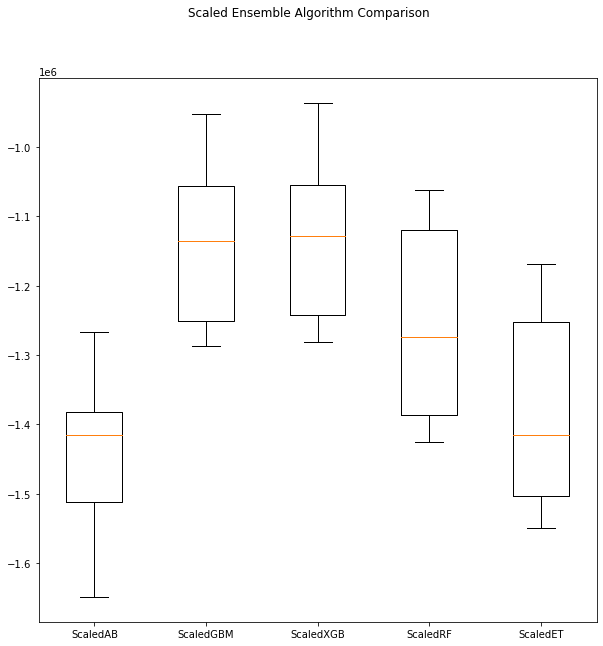

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

GBR

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# learning_rate = [0.05, 0.1, 0.2]
# min_samples_split = [3, 6, 9]
# max_depth = [5, 6, 7]
# max_features = [5, 6, 9]
n_estimators = range(20,200,20)

param_grid = dict(n_estimators=n_estimators)
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1127078.250645 using {'n_estimators': 40}
-1182284.571527 (113632.978469) with: {'n_estimators': 20}
-1127078.250645 (112177.875382) with: {'n_estimators': 40}
-1128834.700798 (113613.881403) with: {'n_estimators': 60}
-1133211.403115 (114195.015176) with: {'n_estimators': 80}
-1137616.782255 (115119.901707) with: {'n_estimators': 100}
-1143240.513699 (116359.639086) with: {'n_estimators': 120}
-1147809.801143 (116665.126158) with: {'n_estimators': 140}
-1152757.096588 (115464.390126) with: {'n_estimators': 160}
-1156369.394567 (112720.624874) with: {'n_estimators': 180}


In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

learning_rate = [0.05, 0.1, 0.2, 0.3,0.5]
# min_samples_split = [3, 6, 9]
# max_depth = [5, 6, 7]
# max_features = [5, 6, 9]
# n_estimators = range(20,100,20)

param_grid = dict(learning_rate=learning_rate)
model = GradientBoostingRegressor(random_state=seed, n_estimators=40)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1127078.250645 using {'learning_rate': 0.1}
-1187944.370314 (113593.107776) with: {'learning_rate': 0.05}
-1127078.250645 (112177.875382) with: {'learning_rate': 0.1}
-1136539.141043 (115727.188329) with: {'learning_rate': 0.2}
-1153652.363902 (117394.128430) with: {'learning_rate': 0.3}
-1204722.397265 (117900.419153) with: {'learning_rate': 0.5}


In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# learning_rate = [0.05, 0.1, 0.2]
min_samples_split = [3, 6, 9, 12, 20]
# max_depth = [5, 6, 7]
# max_features = [5, 6, 9]
# n_estimators = range(20,100,20)

param_grid = dict(min_samples_split=min_samples_split)
model = GradientBoostingRegressor(random_state=seed, n_estimators=40, learning_rate=0.1)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1127084.277747 using {'min_samples_split': 3}
-1127084.277747 (112183.732830) with: {'min_samples_split': 3}
-1127150.582586 (112204.939091) with: {'min_samples_split': 6}
-1127312.210521 (112158.697662) with: {'min_samples_split': 9}
-1127486.054787 (112125.225913) with: {'min_samples_split': 12}
-1127252.737140 (111914.188734) with: {'min_samples_split': 20}


In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# learning_rate = [0.05, 0.1, 0.2]
# min_samples_split = [3, 6, 9]
max_depth = [5, 6, 7, 10, 12, 20]
# max_features = [5, 6, 9]
# n_estimators = range(20,100,20)

param_grid = dict(max_depth=max_depth)
model = GradientBoostingRegressor(random_state=seed, n_estimators=40, learning_rate=0.1, min_samples_split=3)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1140478.214604 using {'max_depth': 5}
-1140478.214604 (119950.803545) with: {'max_depth': 5}
-1155848.848158 (130947.071156) with: {'max_depth': 6}
-1175581.857256 (135964.048157) with: {'max_depth': 7}
-1244868.040591 (144297.389896) with: {'max_depth': 10}
-1310561.631184 (135578.706218) with: {'max_depth': 12}
-1583001.402498 (144385.950914) with: {'max_depth': 20}


In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# learning_rate = [0.05, 0.1, 0.2]
# min_samples_split = [3, 6, 9]
# max_depth = [5, 6, 7]
max_features = [5, 6, 9, 10,11,12]
# n_estimators = range(20,100,20)

param_grid = dict(max_features=max_features)
model = GradientBoostingRegressor(random_state=seed, n_estimators=40, learning_rate=0.1, min_samples_split=3, max_depth=5)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1132208.602690 using {'max_features': 11}
-1230382.957487 (107519.398406) with: {'max_features': 5}
-1200674.603064 (98193.242233) with: {'max_features': 6}
-1138021.286051 (107914.123531) with: {'max_features': 9}
-1135920.775235 (107613.751601) with: {'max_features': 10}
-1132208.602690 (108552.572095) with: {'max_features': 11}
-1134932.539750 (111825.614129) with: {'max_features': 12}


In [ ]:
gbr =   GradientBoostingRegressor(n_estimators=40, learning_rate=0.1, min_samples_split=3, max_depth=5, max_features=11)

gbr.fit(X_train, Y_train)

print(round(gbr.score(X_test, Y_test)*100))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test, gbr.predict(X_test))))    

57
Root Mean Squared Error: 1151.7608708367256


XGB

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# learning_rate = [0.05, 0.1, 0.2]
n_estimators = range(600,1000,100)

param_grid = dict(n_estimators=n_estimators)
model = XGBRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

[08:32:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -1211894.350749 using {'n_estimators': 600}
-1211894.350749 (112705.712280) with: {'n_estimators': 600}
-1222396.894389 (107121.425640) with: {'n_estimators': 700}
-1236281.238085 (103082.942308) with: {'n_estimators': 800}
-1247551.600808 (101493.476693) with: {'n_estimators': 900}


In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

learning_rate = [0.05, 0.1, 0.2]
# n_estimators = range(500,1000,100)

param_grid = dict(learning_rate=learning_rate)
model = XGBRegressor(random_state=seed, n_estimators=600)
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

[08:33:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best: -1171535.185723 using {'learning_rate': 0.05}
-1171535.185723 (118236.966245) with: {'learning_rate': 0.05}
-1211894.350749 (112705.712280) with: {'learning_rate': 0.1}
-1274343.810212 (94692.571341) with: {'learning_rate': 0.2}


In [ ]:
my_model = XGBRegressor(n_estimators=600, learning_rate=0.05)
my_model.fit(X_train, Y_train)

[08:33:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, n_estimators=600)

In [ ]:
print(round(my_model.score(X_test, Y_test)*100))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(Y_test, my_model.predict(X_test))))    

58
Root Mean Squared Error: 1143.938238973532


In [ ]:
y_pre=my_model.predict(X_test)
pred_rf=pd.DataFrame(y_pre,columns=['predicted_rf'])
true_values=list(Y_test.values)
pred_rf['true_value']=true_values

In [ ]:
comp=pred_rf
comp=comp.iloc[:15]
true_value=comp['true_value']
predicted_value=comp['predicted_rf']

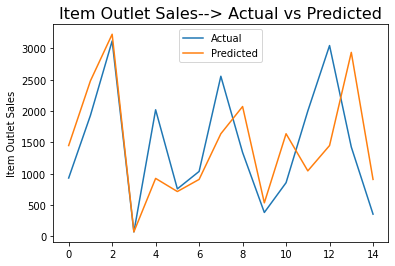

In [ ]:
plt.plot(true_value)
plt.plot(predicted_value)
plt.ylabel('Item Outlet Sales')
plt.legend(['Actual','Predicted'])
plt.title("Item Outlet Sales--> Actual vs Predicted",fontsize=16)
plt.show()